# 활성화 함수 (Activation Function)

딥러닝의 **활성화 함수(Activation Function)** 란, 뉴런에서 계산된 값에 **비선형성(non-linearity)** 을 부여하여 모델이 복잡한 패턴을 학습할 수 있도록 도와주는 함수이다.

입력 신호를 받아 출력 신호로 바꿔주는 역할을 하며, 주로 은닉층과 출력층에서 사용된다.

**주요 활성화 함수 정리**

| 이름             | 수식 또는 특징                                  | 장점                        | 단점                            |
| -------------- | ----------------------------------------- | ------------------------- | ----------------------------- |
| **Sigmoid**    | `1 / (1 + exp(-x))`                       | 출력이 0\~1로 제한되어 확률처럼 해석 가능 | 기울기 소실(Vanishing Gradient) 문제 |
| **Tanh**       | `(exp(x) - exp(-x)) / (exp(x) + exp(-x))` | 출력이 -1\~1로 중심이 0          | 여전히 기울기 소실 문제 있음              |
| **ReLU**       | `max(0, x)`                               | 계산 간단, 빠름, 기울기 소실 문제 적음   | x<0이면 출력이 0이라 죽은 뉴런 발생 가능     |
| **Leaky ReLU** | `x if x>0 else αx (보통 α=0.01)`            | ReLU의 죽은 뉴런 문제 개선         | α값 선택이 임의적                    |
| **Softmax**    | `exp(xᵢ) / sum(exp(xⱼ))` (출력층에서 사용)       | 다중 클래스 분류에서 확률 출력         | 출력 간 상호의존성 있음                 |

---


> **활성화 함수가 없다면** 딥러닝 모델은 선형 함수들의 조합에 불과해 어떤 복잡한 문제도 해결하지 못한다.

### 계단 함수 (Step Function)

$ f(x) = \begin{cases} 1, & x \geq 0 \\ 0, & x < 0 \end{cases}$

- 입력값이 0 이상이면 1, 그렇지 않으면 0 출력
- 미분 불가하고, 작은 변화에도 값이 급격히 변하여 역전파 학습에 부적합

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.linspace(-5, 5, 100)

In [3]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

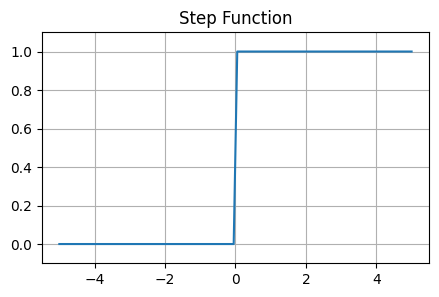

In [4]:
plt.figure(figsize=(5, 3))
plt.plot(X, step_function(X))
plt.title('Step Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

# Sigmoid Function (시그모이드함수)

$ f(x) = \frac{1}{1 + e^{-x}} $

- 출력 범위: (0, 1) 사이값, 중심점(0, 0.5) → 출력값 양수 = 입력값 양수(다음 레이어에서 받는 것) → 편향된 결과
- 매끄러운 S자 곡선 형태로 확률 해석 가능
- 기울기 소실(Vanishing Gradient) 문제 발생 가능

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

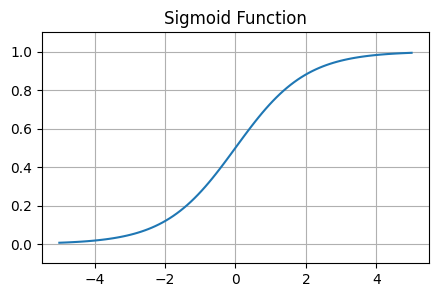

In [6]:
plt.figure(figsize=(5, 3))
plt.plot(X, sigmoid(X))
plt.title('Sigmoid Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### 하이퍼볼릭 탄젠트 함수 (Hyperbolic Tangent Function, Tanh)

$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

- 출력 범위: (-1, 1) 사이값, 중심점이 (0, 0) = 중양 정렬 → 입출력이 양수, 음수 가능
- 기울기 소실 문제 개선됨, 여전히 기울기 소실 문제 있음
- 시그모이드보다 중심이 0에 가까워 더 빠른 학습이 진행 가능

In [7]:
def tanh(x):
    # return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
    return np.tanh(x)

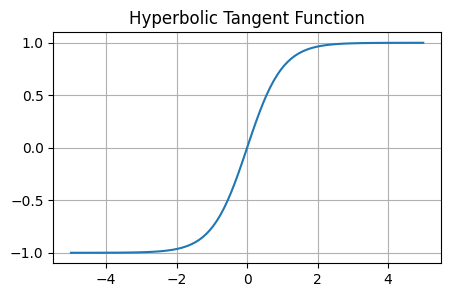

In [8]:
plt.figure(figsize=(5, 3))
plt.plot(X, tanh(X))
plt.title('Hyperbolic Tangent Function')
plt.grid()
plt.ylim(-1.1, 1.1)
plt.show()

### ReLU(Rectified Linear Unit)

$ f(X) = \max(0, X) $

- 출력 범위 : $(0, \infty)$
- 음수 입력에 대해 0을 출력하여 계산이 간단하고 학습 속도가 빠름
- 죽은 뉴런(Dying ReLU) 문제 발생 가능

In [9]:
def relu(x):
    return np.maximum(0, x)

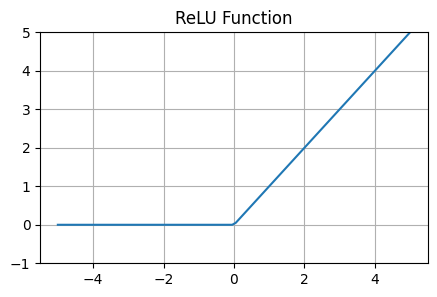

In [10]:

plt.figure(figsize=(5, 3))
plt.plot(X, relu(X))
plt.title('ReLU Function')
plt.grid()
plt.ylim(-1, 5)
plt.show()

### Leaky ReLU

$ f(x) = \begin{cases} x, & x \geq 0 \\ \alpha x, & x < 0\end{cases}$

- alpha 값은 아주 작은 기울기를 적용해준다. 일반적으로 0.01 → 음의 기율기를 정해준다.
- 출력 범위: $(-\infty, \infty)$
- ReLU의 죽은 뉴런 문제를 해결하기 위해 음수 입력에 작은 기울기 $\alpha$를 적용 ($\alpha$는 일반적으로 0.01 사용)

In [11]:
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

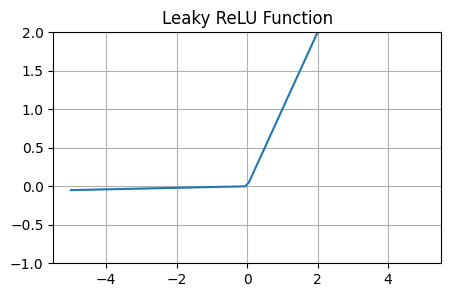

In [12]:
plt.figure(figsize=(5, 3))
plt.plot(X, leaky_relu(X, alpha=0.01))
plt.title('Leaky ReLU Function')
plt.grid()
plt.ylim(-1, 2)
plt.show()

---

In [19]:
# 랜덤한 데이터를 통해서 여러 가지 활성화 함수 비교
import numpy as np
import matplotlib.pyplot as plt

# 랜덤한 데이터 생성
np.random.seed(42)
X = np.random.uniform(-5, 5, size=10)

df = pd.DataFrame({
    "input (X)": X,
    "Step function": step_function(X),
    "Sigmoid function": sigmoid(X),
    "Tanh function": tanh(X),
    "ReLU function": relu(X),
    "Leaky ReLU function": leaky_relu(X),
})

df

,input (X),Step function,Sigmoid function,Tanh function,ReLU function,Leaky ReLU function
0,-1.254599,0,0.221905,-0.849568,0.000000,-0.012546
1,4.507143,1,0.989090,0.999757,4.507143,4.507143
2,2.319939,1,0.910515,0.980867,2.319939,2.319939
3,0.986585,1,0.728413,0.755902,0.986585,0.986585
4,-3.439814,0,0.031074,-0.997945,0.000000,-0.034398
5,-3.440055,0,0.031067,-0.997946,0.000000,-0.034401
6,-4.419164,0,0.011901,-0.999710,0.000000,-0.044192
7,3.661761,1,0.974956,0.998681,3.661761,3.661761
8,1.011150,1,0.733245,0.766237,1.011150,1.011150
9,2.080726,1,0.889016,0.969308,2.080726,2.080726


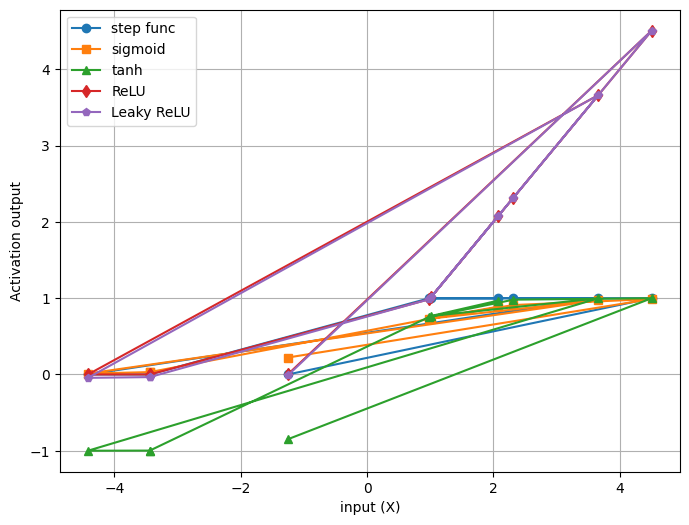

In [20]:
plt.figure(figsize=(8, 6))

plt.plot(df["input (X)"], df["Step function"], marker='o', label='step func')
plt.plot(df["input (X)"], df["Sigmoid function"], marker='s', label='sigmoid')
plt.plot(df["input (X)"], df["Tanh function"], marker='^', label='tanh')
plt.plot(df["input (X)"], df["ReLU function"], marker='d', label='ReLU')
plt.plot(df["input (X)"], df["Leaky ReLU function"], marker='p', label='Leaky ReLU')

plt.xlabel('input (X)')
plt.ylabel('Activation output')
plt.legend()
plt.grid()
plt.show()

---

### 기울기 소실/폭발

 - Deep Learning 에서 기울기(Gradient)란? 기울기, 그리고 절편(bias)는 굉장히 중요하다.
 - 가중치/절편을 **업데이트** 하기 위한 미분값(기울기/Gradient)
    1. 이 기울기 값이 너무 작아진다면, 가중치/절편을 업데이트 할 수 없다. → 기울기 소실문제
    2. 이 기울기 값이 너무 커지면, 가중치/절편에 대한 최적화가 어렵다. → 기울기 폭발문제

In [69]:
np.random.seed(42)

# 층 개수
n_layers = 10
input_dim = 20

# 초기 가중치/절편
W = np.random.randn(input_dim, input_dim) * 0.01
X = np.random.randn(input_dim, 1)

# 순전파
for i in range(n_layers):
    X = sigmoid(np.dot(W, X))
    print(f'{i+1}층 출력: {np.mean(X)}')
print('--------------------------------')

# 역전파
for i in range(n_layers):
    dX = X * (1 - X)
    W -= np.dot(dX, X.T) * 0.01
    print(f'{i+1}층 기울기: {np.mean(dX)}')
print('--------------------------------')

1층 출력: 0.49818118379613796
2층 출력: 0.5005619776114618
3층 출력: 0.5005553940887977
4층 출력: 0.5005552002460804
5층 출력: 0.5005551968541957
6층 출력: 0.500555196868862
7층 출력: 0.5005551968691317
8층 출력: 0.5005551968691347
9층 출력: 0.5005551968691346
10층 출력: 0.5005551968691346
--------------------------------
1층 기울기: 0.24997045730548795
2층 기울기: 0.24997045730548795
3층 기울기: 0.24997045730548795
4층 기울기: 0.24997045730548795
5층 기울기: 0.24997045730548795
6층 기울기: 0.24997045730548795
7층 기울기: 0.24997045730548795
8층 기울기: 0.24997045730548795
9층 기울기: 0.24997045730548795
10층 기울기: 0.24997045730548795
--------------------------------


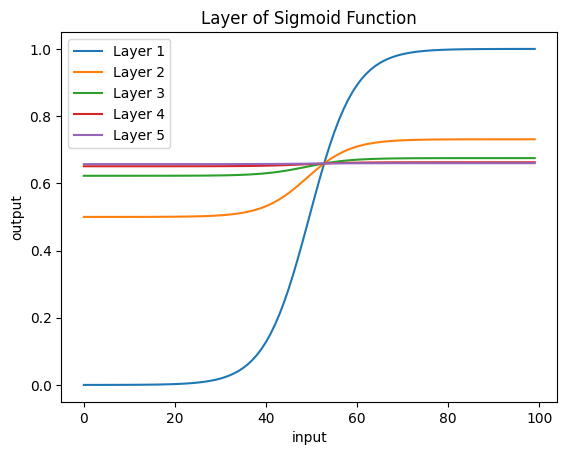

In [26]:
# 시그모이드 활성화함수를 n번 사용한 경우 시각화

x= np.linspace(-10, 10, 100)

for i in range(1, 6):
    x = sigmoid(x)
    plt.plot(x, label=f'Layer {i}')

plt.xlabel('input')
plt.ylabel('output')
plt.title('Layer of Sigmoid Function')
plt.legend()
plt.show()

### 기울기 소실 문제를 해결하는 방법
1. sigmoid 외의 활성화 함수 사용하는 방법
2. 잔차 연결 (skip connection)

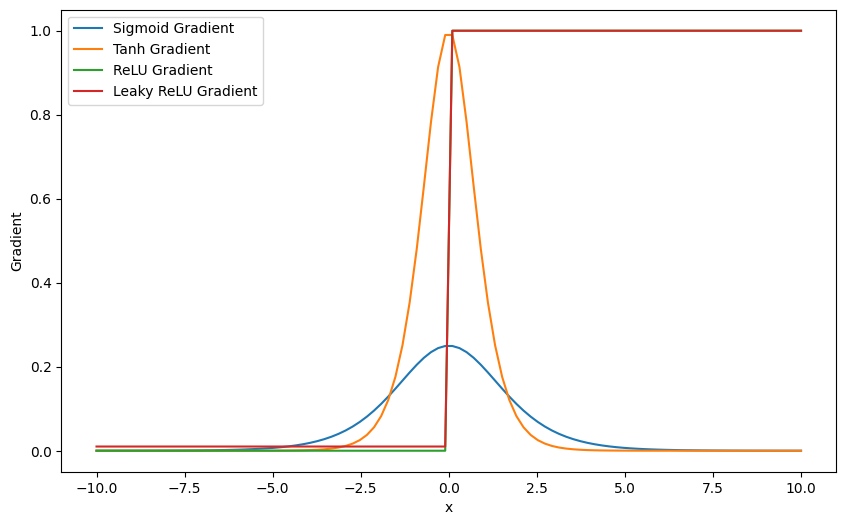

In [38]:
# 활성화 함수에 대한 도함수: 미분
def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_grad(x):
    t = tanh(x)
    return 1 - t**2

def relu_grad(x):
    return np.where(x >= 0, 1, 0)

def leaky_relu_grad(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x <= 0] = alpha
    return dx

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid_grad(x), label='Sigmoid Gradient')
plt.plot(x, tanh_grad(x), label='Tanh Gradient')
plt.plot(x, relu_grad(x), label='ReLU Gradient')
plt.plot(x, leaky_relu_grad(x), label='Leaky ReLU Gradient')
plt.xlabel('x')
plt.ylabel('Gradient')
plt.legend(loc='upper left')
plt.show()


# 잔차연결 Residual Connection (Skip Connection)

In [ ]:
import torch
import torch.nn as nn

torch.manual_seed(42) # torch 난수시드 고정

n_layers = 10    # 9개의 은닉층과 1개의 출력층
input_dim = 10   # 한번에 10개의 값을 주겠다. 입력층 뉴런 개수
                 # iris 데이터에서는 input_dim = 4
                 # 현재 예시에서는 input_dim = 10, 즉 10차원 데이터를 입력받는다.
                 # 즉, 10차원 데이터를 입력받아 10차원 데이터를 출력한다.
                 # Layer 10개 → 10차원 데이터를 10차원 데이터로 변환
                 # 즉, 10차원 데이터를 입력받아 10차원 데이터를 출력한다.
                 # 총 파라미터 개수 = ((10 * 10) + 10) * 10 = 1100개
                 # 1개의 뉴런에 10개의 가중치와 1개의 절편이 있으므로, 10 * 10 + 10 = 110개의 파라미터가 있다.
                 # 10개의 레이어를 가지므로, 110 * 10 = 1100개의 파라미터가 있다.

# 일반 네트워크
class PlainNet(nn.Module):                                                     # pytorch 모델 클래스 상속 → Base Estimator 와 비슷
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([                                          # ModuleList → 신경망의 레이어들을 리스트에 저장하고 관리할 수 있다.
            nn.Linear(input_dim, input_dim) for _ in range(n_layers)           # 입력층과 출력층의 뉴런 개수가 같다.
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            x = self.relu(x)
        return x

# 잔차연결 네트워크
class ResNet(nn.Module):                                                       # pytorch 모델 클래스 상속 → Base Estimator 와 비슷
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([                                          # ModuleList → 신경망의 레이어들을 리스트에 저장하고 관리할 수 있다.
            nn.Linear(input_dim, input_dim) for _ in range(n_layers)           # 입력층과 출력층의 뉴런 개수가 같다.
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            out = layer(x)
            out = self.relu(out)
            x = x + out             # 출력값과 입력값을 더해서 최종 출력
        return x

plain_model = PlainNet()
res_model = ResNet()
criterion = nn.MSELoss()           # 손실함수
# optimizer = torch.optim.Adam(plain_model.parameters(), lr=0.01)

# for epoch in range(100):
#     optimizer.zero_grad()
#     outputs = plain_model(inputs)
    

In [ ]:
# 입력값/타겟값
                                 # x는 입력값, y는 타겟값
x = torch.randn(1, input_dim)    # 평균 0, 표준편차 1인 정규분포 데이터 샘플링
y = torch.randn(1, input_dim)    

# 시각화를 위한 기울기 모음
plain_grad = []
res_grad = []

# 1. 일반모델 학습
plain_model.zero_grad()       # ✅ gradient 누적 방지
output = plain_model(x)       # 예측값
loss = criterion(output, y)   # 손실함수 계산, 실제값, 예측값
loss.backward()               # 오차에 대한 기울기 계산

print('일반 모델 기울기: ')
for i, layer in enumerate(plain_model.layers):
    print(f'Layer {i+1} 기울기: {layer.weight.grad.norm():.4f}')
    plain_grad.append(layer.weight.grad.norm().item())

# 2. 잔차연결 모델 학습
res_model.zero_grad()         # ✅ gradient 누적 방지
output = res_model(x)         # 예측값
loss = criterion(output, y)   # 손실함수 계산, 실제값, 예측값
loss.backward()               # 오차에 대한 기울기 계산

print('잔차연결 모델 기울기: ')
for i, layer in enumerate(res_model.layers):
    print(f'Layer {i+1} 기울기: {layer.weight.grad.norm():.4f}')
    res_grad.append(layer.weight.grad.norm().item())


일반 모델 기울기: 
Layer 1 기울기: 0.0011
Layer 2 기울기: 0.0007
Layer 3 기울기: 0.0008
Layer 4 기울기: 0.0017
Layer 5 기울기: 0.0086
Layer 6 기울기: 0.0334
Layer 7 기울기: 0.0810
Layer 8 기울기: 0.0911
Layer 9 기울기: 0.1492
Layer 10 기울기: 0.2886
잔차연결 모델 기울기: 
Layer 1 기울기: 25.6212
Layer 2 기울기: 20.2959
Layer 3 기울기: 13.6459
Layer 4 기울기: 17.0231
Layer 5 기울기: 14.2516
Layer 6 기울기: 8.0281
Layer 7 기울기: 13.8187
Layer 8 기울기: 11.0831
Layer 9 기울기: 12.3008
Layer 10 기울기: 11.0781


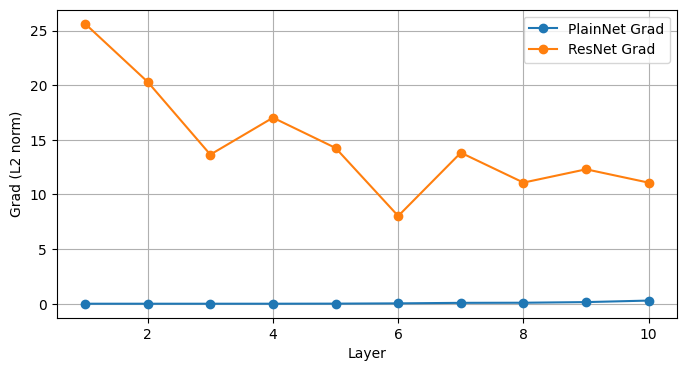

In [64]:
# 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_layers + 1), plain_grad, label='PlainNet Grad', marker='o')
plt.plot(range(1, n_layers + 1), res_grad, label='ResNet Grad', marker='o')

plt.xlabel('Layer')
plt.ylabel('Grad (L2 norm)')
plt.legend()
plt.grid()
plt.show()